<a href="https://colab.research.google.com/github/sravanichinnu/LV_Resorts_NLP/blob/main/LV_Resorts_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywsd

In [ ]:
pip install -U wn==0.0.22

In [ ]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for nmeric calculation
import matplotlib.pyplot as plt # for data visualization

from google.colab import files
from google.colab import drive
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from pywsd.utils import lemmatize_sentence
import string
nltk.download('stopwords')

In [ ]:
drive.mount('/content/drive',force_remount=True)

In [ ]:
#Problem 1: Sentiment analysis
#reading vegas2015reviews.csv dataset
df = pd.read_csv('/content/drive/My Drive/TripAdvisor/vegas2015reviews.csv')

#converting dates column into pandas datetime columns
df["ratingDate"] = pd.to_datetime(df["ratingDate"])

#reading vegas_vinfo.csv dataset
venue = pd.read_csv("/content/drive/My Drive/TripAdvisor/vegas_vinfo.csv")

#merging the two datasets "vegas2015reviews.csv" and "vegas_vinfo.csv" based on its comon column named "gd"
df = pd.merge(df, venue, on=["gd"])

In [ ]:
#storing the column values of "reviewtext"
reviews = df[df.columns[10]]

In [ ]:
#from the resulting merged dataframe:
# 1. How many reviews are there?
df.shape

(46644, 27)

In [ ]:
#from above, there are 46644 number of reviews
#2. How may unique hotels are there? Note "gd" is the ID variable for hotels on TripAdvisor
len(pd.unique(df['gd']))

34

In [ ]:
#from above, there are 34 unique hotels
#3. What are the unique types of travel categories?
pd.unique(df['travel_category'])

array(['business', 'couple', 'friends', 'family', nan, 'solo'],
      dtype=object)

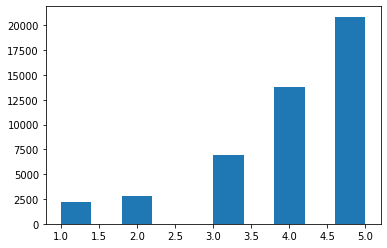

In [ ]:
#4. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resots?
plt.hist(df['reviewrating'])
plt.show()

In [ ]:
#from the above histogram, we can say that, over more than 20000 visitors gave the highest rating of 5.

In [ ]:
#Sentiment
#using "TextBlob" library to compute the polarity and subjectivity of every review.


In [ ]:
#data preprocessing for textual variables
#Lowercasing: Before we need to calculate the sentiment scores for each review it is important to pre-process the textual data.
#lowercasing helps in the process of normalization which is an important step to keep the words in a uniform manner.

#change the review type to string
df['reviewtext'] = df['reviewtext'].astype("string")

#lowercasing all the reviews
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing punctuations
import string
string.punctuation

def remove_punctuation(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation])
  return punctuationfree

#storing the punctuation free text
df['reviewtext'] = df['reviewtext'].apply(lambda x:remove_punctuation(x))

#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#stemming - this reduces all words with the same roots to a common form by removing suffixes
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
#computing polarity and subjectivity
from textblob import TextBlob

def sent_polarity(x):
  return TextBlob(x).sentiment.polarity

def sent_subjectivity(x):
  return TextBlob(x).sentiment.subjectivity

df['polarity'] = df['reviewtext'].apply(sent_polarity)
df['subjectivity'] = df['reviewtext'].apply(sent_subjectivity)

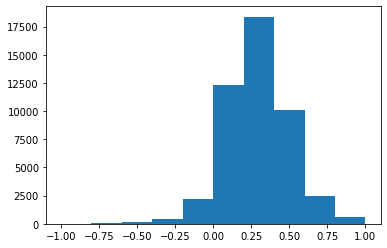

In [ ]:
#compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
plt.hist(df['polarity'])
plt.show()

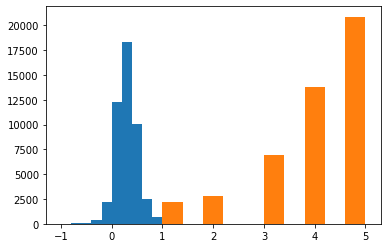

In [ ]:
from matplotlib import pyplot as Plt

plt.hist(df['polarity'])
plt.hist(df['reviewrating'])
plt.show()

In [ ]:
#Even though we hae more than 20000 number of reviews with rating as 5 which can be considered as the highest and very positive rating, we have less than 2500 reviews for which polarity of rating is +1 or near to +1.
#From this I can conclude that, rating might not define the review.

In [ ]:
#2. To what degree are polarity and subjectivity correlated with ratings?
column1 = df['reviewrating']
column2 = df['polarity']
column3 = df['subjectivity']
pol_corr = column2.corr(column1)
subj_corr = column3.corr(column1)
print("correlation between polarity and reviewrating:",pol_corr)
print("correlation between subjectivity and reviewrating:",subj_corr)

correlation between polarity and reviewrating: 0.3989884165041332
correlation between subjectivity and reviewrating: 0.13350978736293542


In [ ]:
#3. calculate correlation between review ratings and polarity by travel category
travel_pol_corr = df.groupby('travel_category')[['polarity','reviewrating']].corr().iloc[0::2,-1]
travel_subj_corr = df.groupby('travel_category')[['subjectivity','reviewrating']].corr().iloc[0::2,-1]
print(travel_pol_corr)
print(travel_subj_corr)

travel_category          
business         polarity    0.422557
couple           polarity    0.369926
family           polarity    0.406306
friends          polarity    0.412402
solo             polarity    0.379060
Name: reviewrating, dtype: float64
travel_category              
business         subjectivity    0.154945
couple           subjectivity    0.127599
family           subjectivity    0.118305
friends          subjectivity    0.130661
solo             subjectivity    0.159631
Name: reviewrating, dtype: float64


In [ ]:
#From above, Business and Couple travel categories have the highest andlowest polarity correlation with ratigns respectively.

In [ ]:
#install nltk
!pip install nltk 
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
#Helper functions

def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks

# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_ not in exclude)&(~w.is_punct)]
# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time

def lemmatize_sentence_corpus(filename,nlp, batch_size, n_threads, sw=[], exclusions=[], encode = 'utf-8'):
    #nlp.disable_pipes(["tagger"]) # disable ner and tagger makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_threads it the number of parallel (simultaneous processes to run)
    # n_threads is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_threads=n_threads):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))

def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_threads, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile,nlp, batch_size, n_threads, sw=sw, exclusions=exclusions, encode = encode)
    print(streamingfile)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')

def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each additional pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram


def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_threads = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved 
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        
        nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
        exclude = set(sw + exclusions)
        
        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_threads=n_threads):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file

In [ ]:
#2. Topics in hotel reviews
#Preprocessing the texts

In [ ]:
#creating a folder in google drive to store my nlp files
import os
os.mkdir("/content/drive/My Drive/NLPRA")

In [ ]:
#changing the working directory to NLPRA
%cd "/content/drive/My Drive/NLPRA"

/content/drive/My Drive/NLPRA


In [ ]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
print(nlp.pipe_names)
nlp.add_pipe(nlp.create_pipe('sentencizer'))

['tagger']


In [ ]:
#write a file containing raw reviews
with open("reviewtext.txt", "w") as f:
  f.write("\n".join(reviews))

In [ ]:
#3. lemmatize this file into file of sentences
#creating a new file to store the lemmatized sentences
lemma_file = open("lemma_reviewtext.txt","w")

file1 = open('reviewtext.txt','r')
lines = file1.readlines()
for line in lines:
  doc = nlp(line)
  updated_words_list = lemmatize(doc, stop)
  lemma_file = open("lemma_reviewtext.txt","a")
  update_line = " ".join(updated_words_list)
  lemma_file.write(update_line)
  lemma_file.write("\n")
  lemma_file.close()

#lemmatizing completed

#remove stopwords, remove punctuation
#initializing "read_file", "write_file", "stop", "punct" - which are the arguments for 
#wrte_parsed_sentence_corpus() function
import string
read_file = "lemma_reviewtext.txt"
write_file = "stop_punc_reviewtext.txt"
stop = stopwords.words('english')
punct = list(string.punctuation)

write_parsed_sentence_corpus(read_file, write_file, nlp, 5,2,stop, punct, encode = 'utf-8')

<generator object lemmatize_sentence_corpus at 0x7f52918cc5d0>
Success


In [ ]:
pip install -U gensim

     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim

In [ ]:
#4. Apply phrase model twice to identify phrases of up to 4 words in length.
#generate phase models using phrase_detection()
from gensim.models.word2vec import LineSentence
from gensim import utils, interfaces
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
#apply phrase model twice to identify phrases of up to 4 words in length
ngram = phrase_detection("stop_punc_reviewtext.txt", "/content/drive/My Drive/NLPRA")

In [ ]:
ngram

In [ ]:
df["parsed_review"] = ""

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
parsed_file = open('parsed_reviews.txt','w')

In [ ]:
#5. Back to the raw reviews and lemamtize + apply the phrase models at the review level,
#write the resulting review-level file to your NLP folder
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
parsed_file = open('parsed_reviews.txt','w')
phrase_prediction("/content/drive/My Drive/NLPRA/reviewtext.txt","/content/drive/My Drive/NLPRA/parsed_reviews.txt",nlp, ngram, stop, punct)

In [ ]:
#6. creating a column in our dataframe called "parsed" which contains the resulting parsed versions of each reviews
with open('parsed_reviews.txt') as f:
    mylist = list(f)

for i in range(0,len(mylist)):
  df.loc[i,'parsed'] = mylist[i]

In [ ]:
#LDA Model(3) - apply LDA model to the parsed reviews

In [ ]:
#create a dictionary
diction = dict(df[df.columns[30]])
print("total dictionary size: ", len(diction))
type(diction)

total dictionary size:  46644


dict

In [ ]:
pip install pyLDAvis

In [ ]:
#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy - for its limitization purposes
import spacy
from nltk.corpus import stopwords

#vis - for visualizing data
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

#load our data
with open("parsed_reviews.txt") as f:
    data = list(f)

In [ ]:
#lemmatizing the data
def lemmatization(texts,allowed_postags=["NOUN","ADJ", "VERB", "ADV"]):
  nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  texts_out = []
  for text in texts:
    doc = nlp(text)
    new_text = []
    for token in doc:
      if token.pos_ in allowed_postags:
        new_text.append(token.lemma_)
    final = " ".join(new_text)
    texts_out.append(final)
  return (texts_out)

lemmatized_texts = lemmatization(data)


In [ ]:
#removing stop words
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
  return final

data_words = gen_words(lemmatized_texts)

In [ ]:
#BIGRAMS and TRIGRAMS
bigrams_phrases = gensim.models.Phrases(data_words, min_count=5,threshold=50)
trigram_phrases = gensim.models.Phrases(bigrams_phrases[data_words],threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
  return (bigram[doc] for doc in texts)

def make_trigram(texts):
  return (trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigram(data_bigrams)
data_bigrams_trigrams = list(data_bigrams_trigrams)
print (data_bigrams_trigrams[1])  

['give', 'wow_factor', 'wynn_encore', 'outstanding', 'accommodation', 'staff', 'also', 'fact', 'pool', 'open', 'resident', 'friend', 'resident', 'restaurant', 'choice', 'want', 'spend', 'plenty', 'little', 'apply', 'gambling', 'area', 'want', 'good', 'evening', 'speak', 'concierge', 'vip', 'access', 'triste', 'nightclub']


In [ ]:
#TF-IDF removal - find extreme words to remove them
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

for i in range(0, len(corpus)):
  bow = corpus[i]
  low_value_words = [] #reinitialize to be safe
  tfidf_ids = [id for id, value in tfidf[bow]]
  bow_ids = [id for id, value in bow]
  low_value_words = [id for id, value in tfidf[bow] if value < low_value]
  drops = low_value_words+words_missing_in_tfidf
  for item in drops:
    words.append(id2word[item])
  words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]

  new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
  corpus[i] = new_bow


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [ ]:
#creating a corpus of reviews where 1 document = 1 review
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
  new = id2word.doc2bow(text)
  corpus.append(new)

print(corpus[0][0:20])

word = id2word[[0][:1][0]]
print(word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]
always


In [ ]:
lda_model_10 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
lda_model_20 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=20,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
lda_model_30 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=30,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
lda_model_40 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=40,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
lda_model_50 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=50,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
lda_model_60 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=60,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
lda_model_70 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word = id2word,
                                            num_topics=70,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")


In [ ]:
#view the topics in LDA model
print(lda_model_10.print_topics())

[(0, '0.273*"great" + 0.133*"staff" + 0.074*"location" + 0.059*"excellent" + 0.048*"beautiful" + 0.046*"friendly" + 0.031*"helpful" + 0.027*"awesome" + 0.022*"spa" + 0.015*"relax"'), (1, '0.027*"smoke" + 0.025*"slot" + 0.023*"gamble" + 0.023*"family" + 0.019*"around" + 0.018*"space" + 0.017*"maybe" + 0.014*"step" + 0.013*"decent" + 0.013*"lack"'), (2, '0.059*"room" + 0.030*"go" + 0.028*"check" + 0.021*"get" + 0.019*"day" + 0.018*"night" + 0.013*"take" + 0.012*"even" + 0.012*"say" + 0.012*"back"'), (3, '0.079*"bed" + 0.069*"bathroom" + 0.063*"large" + 0.053*"suite" + 0.028*"shower" + 0.026*"pool_area" + 0.019*"morning" + 0.017*"window" + 0.016*"standard" + 0.014*"fridge"'), (4, '0.105*"staff_friendly" + 0.055*"plan" + 0.039*"usually" + 0.036*"send" + 0.025*"wear" + 0.025*"switch" + 0.022*"often" + 0.022*"cafe" + 0.021*"courteous" + 0.021*"replace"'), (5, '0.339*"aria" + 0.074*"coffee" + 0.040*"feature" + 0.036*"exceptional" + 0.027*"site" + 0.024*"classy" + 0.024*"figure" + 0.021*"parki

In [ ]:
#compute model perplexity and coherence score
from gensim.models import CoherenceModel

#compute coherence score
#topics = 10
coherence_model_lda_10 = CoherenceModel(model = lda_model_10,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_10 = coherence_model_lda_10.get_coherence()
print("coherence score - 10 topics: ", coherence_lda_10)
#topics = 20
coherence_model_lda_20 = CoherenceModel(model = lda_model_20,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_20 = coherence_model_lda_20.get_coherence()
print("coherence score - 20 topics: ", coherence_lda_20)
#topics = 30
coherence_model_lda_30 = CoherenceModel(model = lda_model_30,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_30 = coherence_model_lda_30.get_coherence()
print("coherence score - 30 topics: ", coherence_lda_30)
#topics = 40
coherence_model_lda_40 = CoherenceModel(model = lda_model_40,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_40 = coherence_model_lda_40.get_coherence()
print("coherence score - 40 topics: ", coherence_lda_40)
#topics = 50
coherence_model_lda_50 = CoherenceModel(model = lda_model_50,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_50 = coherence_model_lda_50.get_coherence()
print("coherence score - 50 topics: ", coherence_lda_50)
#topics = 60
coherence_model_lda_60 = CoherenceModel(model = lda_model_60,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_60 = coherence_model_lda_60.get_coherence()
print("coherence score - 60 topics: ", coherence_lda_60)
#topics = 70
coherence_model_lda_70 = CoherenceModel(model = lda_model_70,
                                        texts = data_words,
                                        dictionary = id2word,
                                        coherence='c_v')
coherence_lda_70 = coherence_model_lda_70.get_coherence()
print("coherence score - 70 topics: ", coherence_lda_70)

coherence score - 10 topics:  0.3159227888096148
coherence score - 20 topics:  0.28279497160969114
coherence score - 30 topics:  0.4010488830212803
coherence score - 40 topics:  0.3981108479625856
coherence score - 50 topics:  0.3915497902311571
coherence score - 60 topics:  0.40845511580071764
coherence score - 70 topics:  0.4209724799499475


In [ ]:
#Number of topics are selected based on the highest coherence score
#Therefore from above we can say that, 70 topics is best

In [ ]:
#visualize the topics
import pyLDAvis.gensim_models
#visualizing the data
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_70, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
58     0.154766  0.528421       1        1  19.832787
48     0.465194  0.299389       2        1  18.129800
42    -0.222478  0.485947       3        1   3.826781
67    -0.130257  0.513866       4        1   2.970683
12     0.530141 -0.118789       5        1   2.788029
...         ...       ...     ...      ...        ...
20    -0.006217 -0.033381      66        1   0.002585
43    -0.006217 -0.033381      67        1   0.002585
4     -0.006217 -0.033381      68        1   0.002585
39    -0.006217 -0.033381      69        1   0.002585
10    -0.006217 -0.033381      70        1   0.002585

[70 rows x 5 columns], topic_info=          Term         Freq         Total Category  logprob  loglift
116      great  35293.00000  35293.000000  Default  30.0000  30.0000
13        room  93354.00000  93354.000000  Default  29.0000  29.0000
17        stay  59053.00000  59053.000000  Default  28.0000  28.0000
74       hotel  52580.00000  52580.000000  Default  27.0000  27.0000
9         nice  19146.00000  19146.000000  Default  26.0000  26.0000
..         ...          ...           ...      ...      ...      ...
25        area      0.00209   6601.071619  Topic70 -10.0835  -4.4025
26      choice      0.00209   3344.807751  Topic70 -10.0835  -3.7227
27   concierge      0.00209   1743.855453  Topic70 -10.0835  -3.0714
28     evening      0.00209   1532.380250  Topic70 -10.0835  -2.9421
29        fact      0.00209   1401.834282  Topic70 -10.0835  -2.8530

[3189 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
901      44  0.999525         able
167      42  0.994730     absolute
906      45  0.997049   acceptable
21       25  0.999668       access
137      19  0.999290  accommodate
...     ...       ...          ...
235      41  0.998800         wynn
49       20  0.994944  wynn_encore
327      25  0.999818         year
539      18  0.997724          yet
102      13  0.998327        young

[889 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[59, 49, 43, 68, 13, 54, 17, 50, 27, 38, 66, 23, 20, 16, 15, 19, 57, 61, 36, 22, 9, 48, 39, 26, 41, 4, 42, 25, 45, 34, 31, 51, 69, 52, 28, 53, 1, 63, 14, 62, 32, 33, 35, 3, 10, 46, 6, 55, 29, 30, 56, 58, 60, 24, 2, 65, 8, 18, 37, 67, 70, 7, 47, 12, 64, 21, 44, 5, 40, 11])

In [ ]:
#Topic5: Maybe represents the utilities provided in the hotels and how comfortable they are
#Topic3: Maybe represets about commuting
#Topic22: Maybe represents planning

In [ ]:
#Use LDA to compare pos vs neg reviewers